## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [27]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [28]:
train, test = keras.datasets.cifar10.load_data()

In [29]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [30]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [31]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [32]:
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [33]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP_LIST = [0.2,0.4]

In [34]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for Dropout_EXP in Dropout_EXP_LIST:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "1 layer %f" %(Dropout_EXP)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for Dropout_EXP in Dropout_EXP_LIST:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp_2(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "2 layer %f" %(Dropout_EXP)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

196/196 [==============================] - 4s 19ms/step - loss: 1.3966 - accuracy: 0.4966 - val_loss: 1.3970 - val_accuracy: 0.5023
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 1.3926 - accuracy: 0.4993 - val_loss: 1.3958 - val_accuracy: 0.5049
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 1.3867 - accuracy: 0.5016 - val_loss: 1.3898 - val_accuracy: 0.5069
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (

196/196 [==============================] - 4s 19ms/step - loss: 1.7494 - accuracy: 0.3635 - val_loss: 1.7397 - val_accuracy: 0.3943
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 1.7547 - accuracy: 0.3591 - val_loss: 1.7385 - val_accuracy: 0.3822
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 1.7498 - accuracy: 0.3612 - val_loss: 1.7091 - val_accuracy: 0.4054
Epoch 48/50
196/196 [==============================] - 4s 19ms/step - loss: 1.7498 - accuracy: 0.3641 - val_loss: 1.7450 - val_accuracy: 0.3883
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7389 - accuracy: 0.3653 - val_loss: 1.7238 - val_accuracy: 0.4004
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7378 - accuracy: 0.3681 - val_loss: 1.7021 - val_accuracy: 0.4117
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param

196/196 [==============================] - 1s 7ms/step - loss: 1.6384 - accuracy: 0.4067 - val_loss: 1.5793 - val_accuracy: 0.4368
Epoch 47/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6427 - accuracy: 0.4058 - val_loss: 1.5761 - val_accuracy: 0.4357
Epoch 48/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6372 - accuracy: 0.4082 - val_loss: 1.5912 - val_accuracy: 0.4326
Epoch 49/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6341 - accuracy: 0.4085 - val_loss: 1.5941 - val_accuracy: 0.4277
Epoch 50/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6303 - accuracy: 0.4134 - val_loss: 1.5864 - val_accuracy: 0.4361
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_laye

Epoch 47/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9929 - accuracy: 0.2532 - val_loss: 1.8707 - val_accuracy: 0.3303
Epoch 48/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9852 - accuracy: 0.2573 - val_loss: 1.8683 - val_accuracy: 0.3247
Epoch 49/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9884 - accuracy: 0.2578 - val_loss: 1.8748 - val_accuracy: 0.3199
Epoch 50/50
196/196 [==============================] - 1s 7ms/step - loss: 1.9852 - accuracy: 0.2563 - val_loss: 1.8742 - val_accuracy: 0.3211


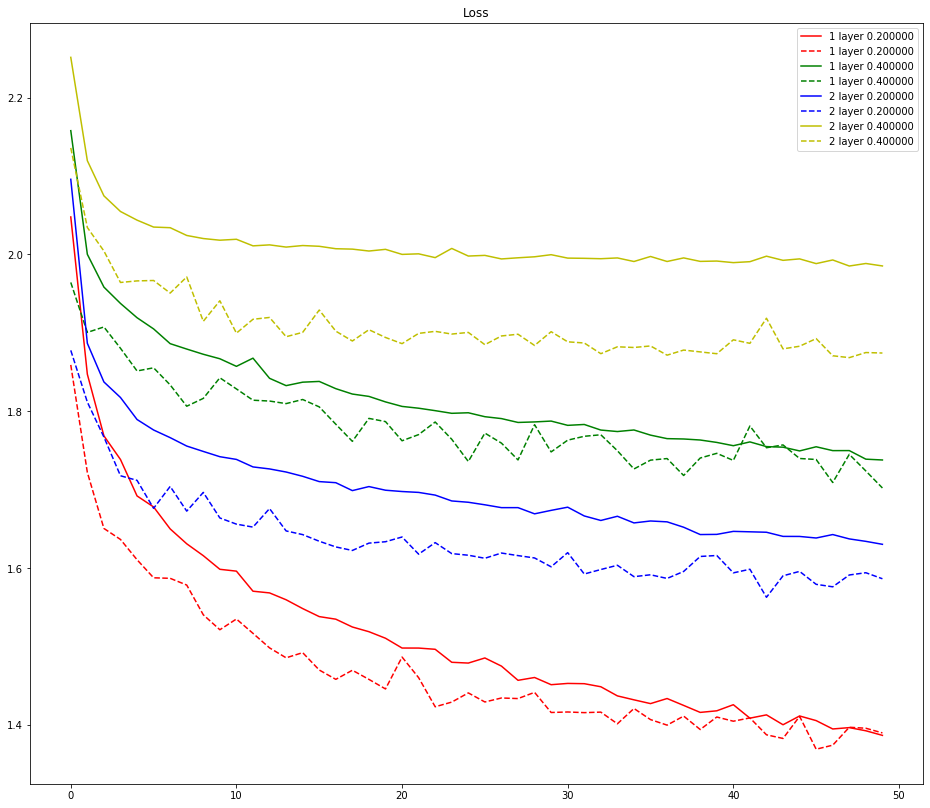

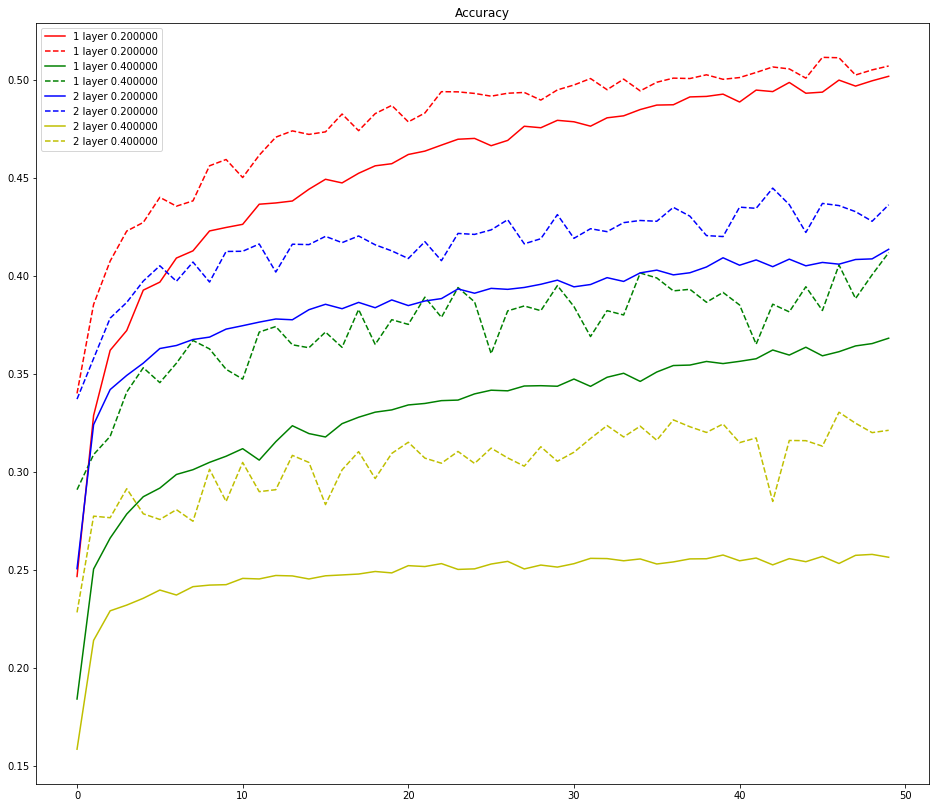

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()